## Astro Physics Collaboration Network Tutorial


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from node2vec import Node2Vec
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import utils
import generate_synthetic_graph_lesson9 as synthetic
file_path = synthetic.get_synthetic_graph_file_path()
G = nx.read_graphml(file_path)
utils.print_graph_info(G)

# %%

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	 18,772
Number of edges:	198,110
Density:		0.001
Graph is undirected and unweighted.
Graph is connected.
Number of nodes:	  4,991
Number of edges:	 77,588
Density:		0.006
Will combine 249 pairs of nodes


  0%|          | 0/249 [00:00<?, ?it/s]

Synthetic graph saved to /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/ca-AstroPh_sample.graphml
Graph is undirected and unweighted.
Graph is connected.
Number of nodes:	  4,841
Number of edges:	 76,676
Density:		0.007


### Dataset Information
This dataset is based on the Astro Physics collaboration network dataset from the arXiv.

**Astro Physics Collaboration Network**

- **Description:**  
  The Astro Physics collaboration network dataset is from the arXiv and captures scientific collaborations between authors who have submitted papers to the Astro Physics category. An undirected edge is created between authors if they have co-authored a paper. For papers co-authored by *k* authors, the dataset generates a complete subgraph on *k* nodes.

- **Time Period:**  
  January 1993 to April 2003 (124 months)

I took a sample of about 5000 nodes from the original dataset and simulated node ambiguity by combining some pairs of nodes into a new node.

In [3]:
[(n, d) for (n, d) in G.nodes(data=True)][0:3]

[('65541', {'label': 'not ambiguous'}),
 ('98315', {'label': 'not ambiguous'}),
 ('13', {'label': 'not ambiguous'})]

In [4]:
df_graph_data = pd.DataFrame([
    [n, d['label']]
    for n, d in G.nodes(data=True)
],
columns=['node_id', 'label']
)
df_graph_data.head()

# %%

,node_id,label
0,65541,not ambiguous
1,98315,not ambiguous
2,13,not ambiguous
3,17,not ambiguous
4,26,not ambiguous


In [5]:
df_graph_data.label.value_counts(normalize=True)

label
not ambiguous    0.969015
ambiguous        0.030985
Name: proportion, dtype: float64

About 1% of the nodes are labeled as "ambigous", our final goal will be to predict this label.

## Section 1: Preparing Graph Data for Supervised Learning Tasks


### Objectives
- Understand the process of cleaning and preparing graph data for supervised learning.
- Learn to load, inspect, and preprocess the Astro Physics collaboration network dataset.


### Introduction
In this section, we overview the data preparation steps required for supervised learning on graph data. This includes loading the dataset, cleaning the data (handling missing values and noise), and splitting the data into training and testing sets. Proper preparation is essential for achieving robust model performance.


### Key Points
- Data ingestion: Load the dataset and verify its structure.
- Data cleaning: Remove noise and handle missing or inconsistent values.
- Data splitting: Partition the dataset into training and testing sets.


### Code Examples
Below are examples of code to load the dataset, inspect basic graph statistics, and visualize properties such as the degree distribution.


Text(0.5, 1.0, 'Degree Distribution of Astro Physics Collaboration Network')

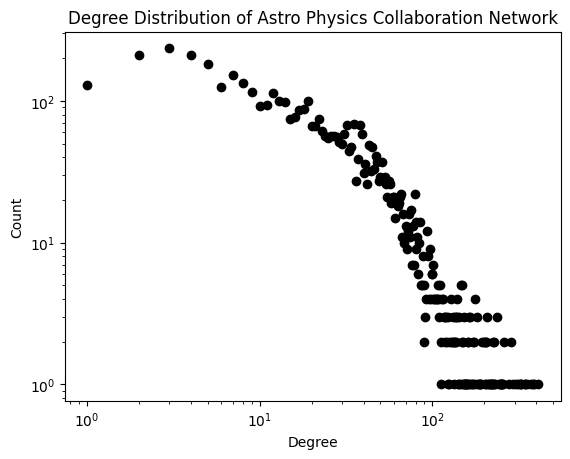

In [6]:
degrees = [G.degree(n) for n in G.nodes()]
ax = utils.log_log_plot(degrees)
ax.set_title("Degree Distribution of Astro Physics Collaboration Network")

### Quiz
1. What are the primary steps involved in preparing graph data for supervised learning tasks?  
2. Why is data cleaning important when working with graph datasets like the Astro Physics network?


### Practical Activities
- **Activity 1:** Write code to clean the dataset by identifying and removing isolated nodes, and extracting only the giant component. Observe how this affects the graph structure.

(hint: look at the `utils` module)


Number of isolated nodes: 0
Cleaned Graph: Number of nodes: 4841
Cleaned Graph: Number of edges: 76676


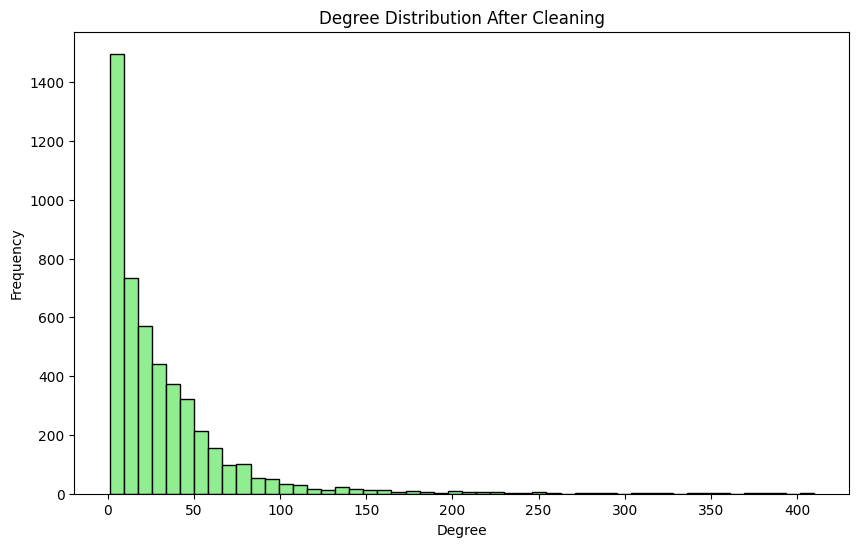

In [7]:
## Answer
...

## Section 2: Feature Engineering and Graph Representation for Supervised Learning


### Objectives
- Learn to extract meaningful features from graph data.
- Understand how to represent graph nodes and edges for supervised learning models.


### Introduction
This section focuses on transforming the Astro Physics collaboration network into feature-rich representations suitable for supervised learning. We will explore techniques such as generating graph embeddings and manually computing graph metrics like degree centrality and clustering coefficients. These features capture different aspects of the graph structure, enabling more effective learning.


### Key Points
- **Graph Embeddings:** Convert nodes into low-dimensional vectors using methods like Node2Vec.
- **Manual Feature Extraction:** Compute graph metrics such as degree centrality and clustering coefficient.
- **Feature Combination:** Integrate multiple feature sources to enhance the input for supervised learning models.


### Code Examples
Below are code examples for generating node embeddings and computing manual graph metrics from the Astro Physics collaboration network. We also visualize the extracted features using PCA.


**Practical Activity:** Write code to generate node embeddings using Node2Vec. Use 32 dimensions, walk length 5, and num_walks 10

In [8]:
## answer
# Should take about 30 seconds to run
# ---------------------------
# Generate Node Embeddings using Node2Vec with reduced parameters
# ---------------------------
...

Computing transition probabilities:   0%|          | 0/4841 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 5/5 [00:00<00:00, 15.27it/s]


Node Embeddings Shape: (4841, 32)


**Practical Activity:** Compute PCA with 5 components and visualize the results using seaborn `pairplot`.

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

...
# df_node2vec_features_pca =

,PC0,PC1,PC2,PC3,PC4,label
0,-0.094409,0.041202,-0.351530,-0.118266,0.021734,not ambiguous
1,0.180525,0.192012,-0.218225,-0.062871,0.156524,not ambiguous
2,0.117079,0.096941,-0.093987,-0.000084,0.030679,not ambiguous
3,0.004686,-0.119969,0.036374,-0.019071,-0.111281,not ambiguous
4,-0.066542,0.117833,-0.023779,-0.109340,0.054529,not ambiguous


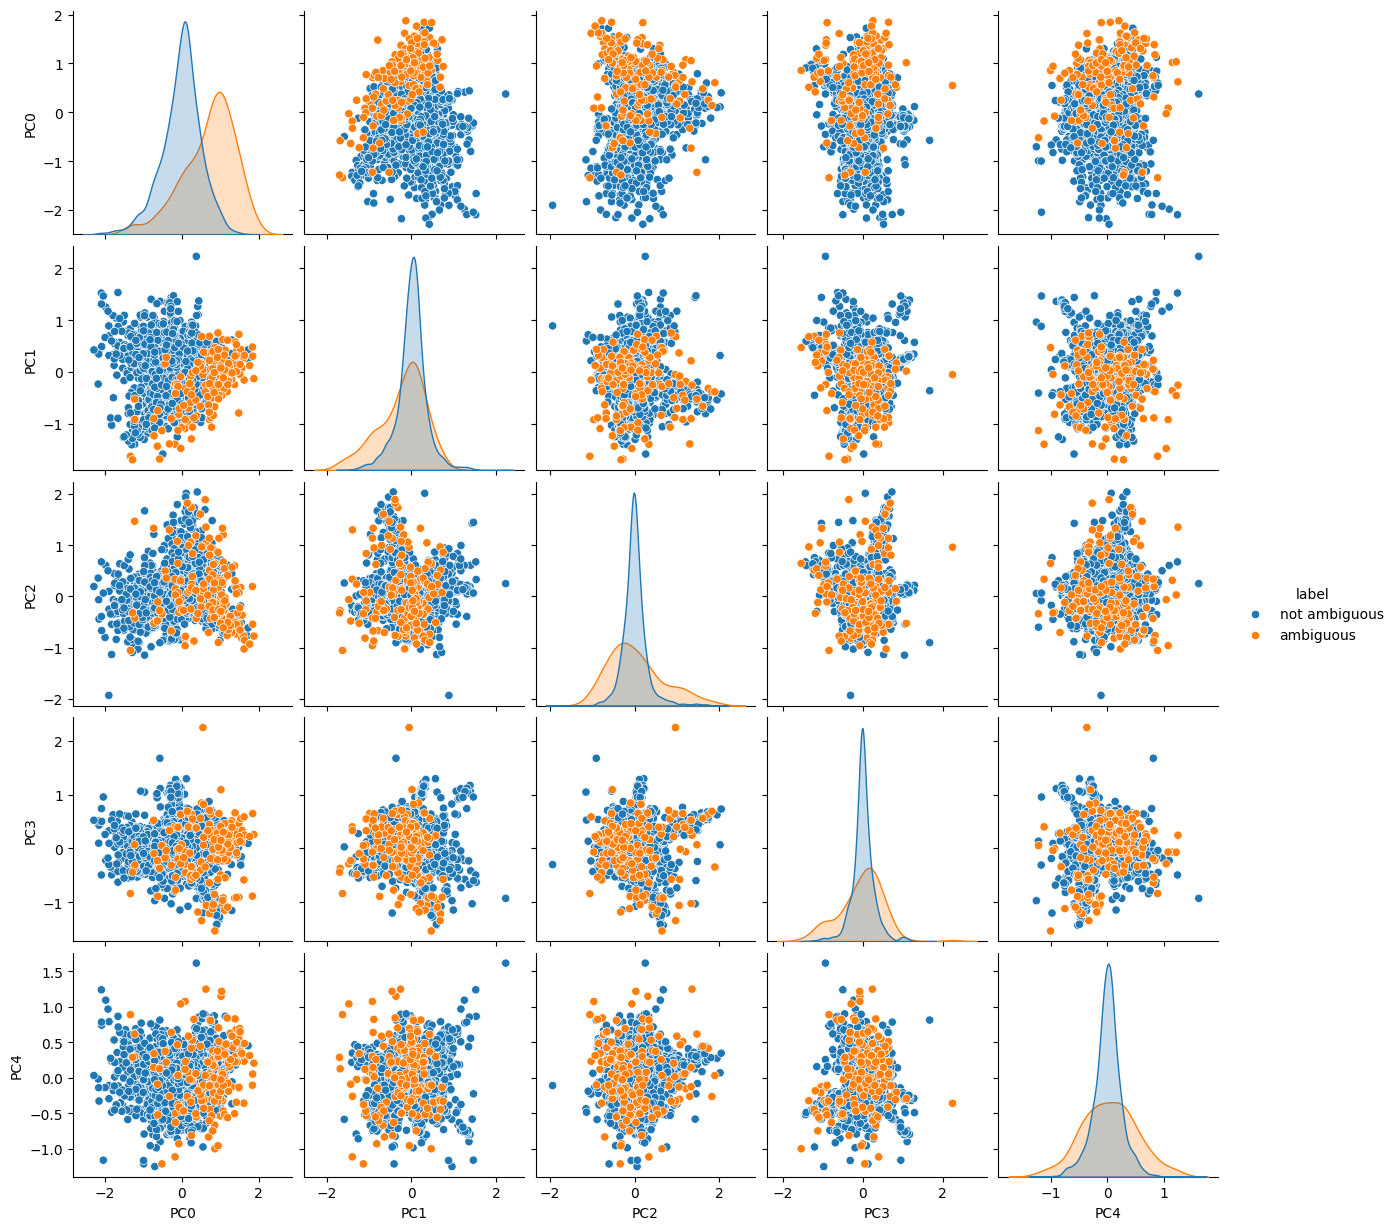

In [10]:
sns.pairplot(
    df_node2vec_features_pca,
    hue="label",
    diag_kind="kde",  # Use KDE plots on diagonal
    diag_kws={"common_norm": False},  # Normalize each KDE separately
)

In [11]:
# Compute Manual Graph Metrics on the Subgraph:
# Centrality metrics:
# - Degree centrality
# - Clustering coefficient
# - [CANCELED: this is too slow] Betweenness centrality
# - PageRank
# Connectivity metrics:
#  - log(Number of neighbors+1)
#  - log(Number of triangles+1)

df_manual_features = pd.DataFrame()
deg_centrality = nx.degree_centrality(G)
clust_coeff = nx.clustering(G)
# betweenness_centrality = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)
num_neighbors = dict(G.degree())
num_triangles = nx.triangles(G)
nodes = list(G.nodes())
df_manual_features = pd.DataFrame(
    {
        "node_id": nodes,
        "degree_centrality": [deg_centrality[node] for node in nodes],
        "clustering_coefficient": [clust_coeff[node] for node in nodes],
        # "betweenness_centrality": [betweenness_centrality[node] for node in nodes],
        "pagerank": [pagerank[node] for node in nodes],
        "log1p_num_neighbors": np.log1p([num_neighbors[node] for node in nodes]),
        "log1p_num_triangles": np.log1p([num_triangles[node] for node in nodes]),
    }
)

# Set node_id as index
df_manual_features.set_index("node_id", inplace=True)
df_manual_features['label'] = df_graph_data['label'].values

print(f"Manual features computed for {len(df_manual_features)} nodes")
df_manual_features.head()

Manual features computed for 4841 nodes


,degree_centrality,clustering_coefficient,pagerank,log1p_num_neighbors,log1p_num_triangles,label
node_id,,,,,,
65541,0.001033,1.000000,0.000084,1.791759,2.397895,not ambiguous
98315,0.003512,0.477941,0.000168,2.890372,4.189655,not ambiguous
13,0.001033,0.600000,0.000079,1.791759,1.945910,not ambiguous
17,0.000207,0.000000,0.000037,0.693147,0.000000,not ambiguous
26,0.000620,0.333333,0.000074,1.386294,0.693147,not ambiguous


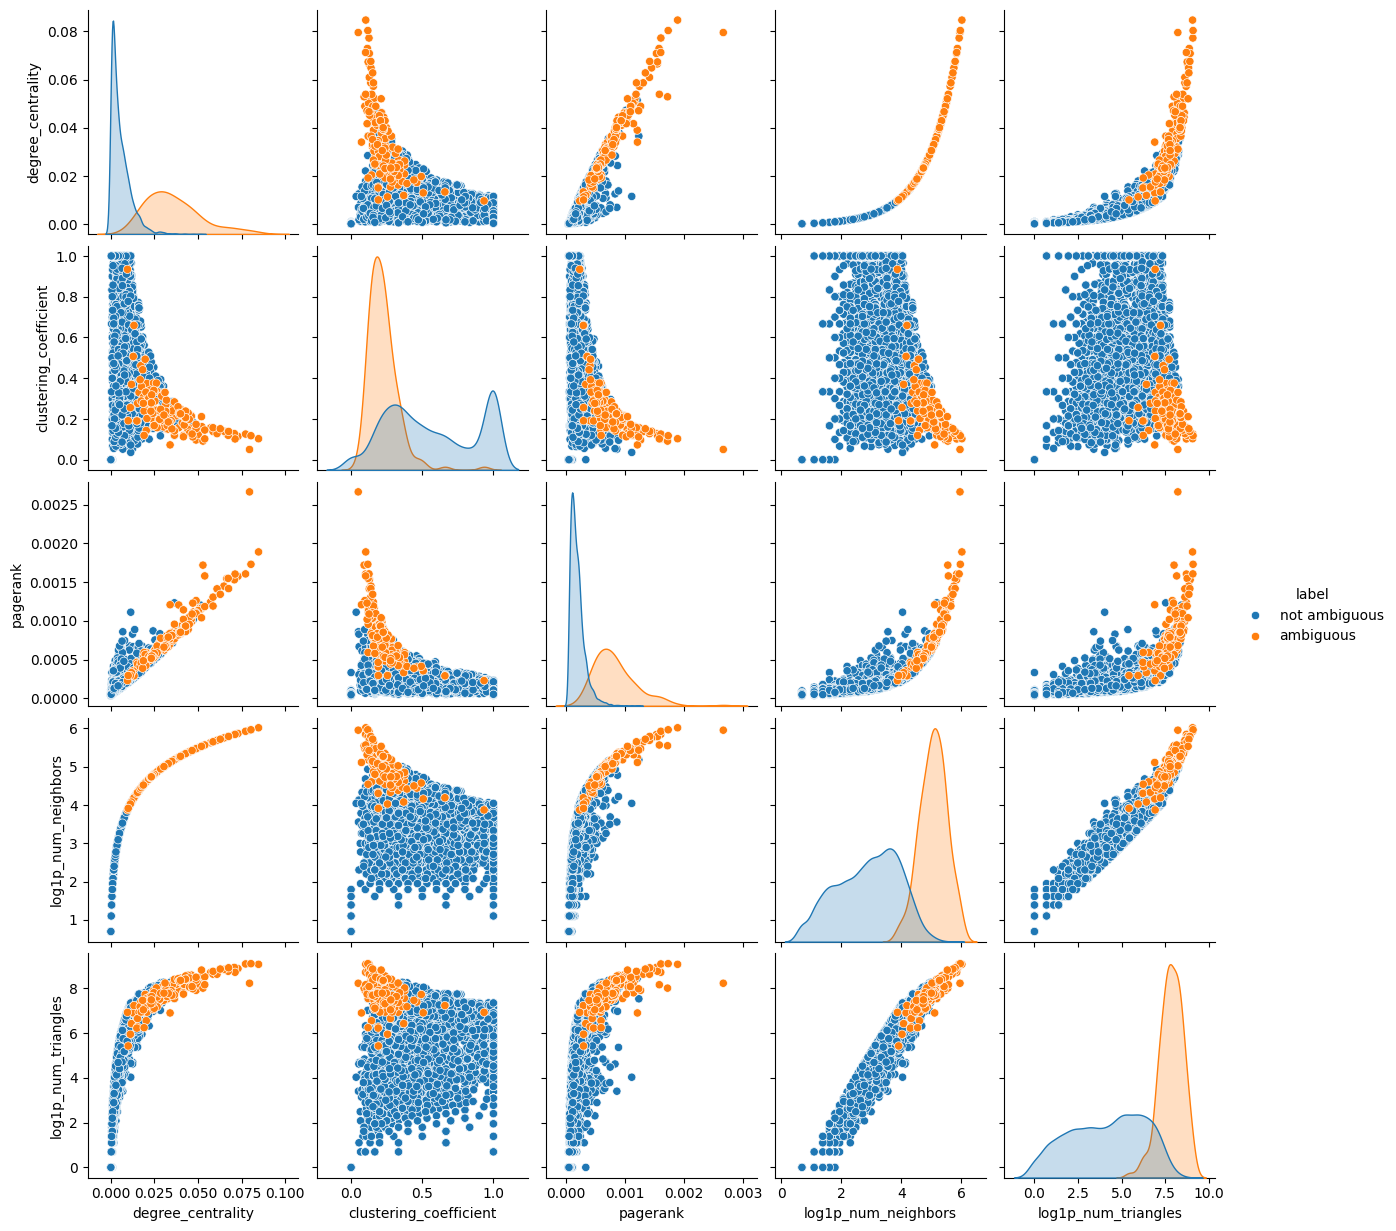

In [12]:
sns.pairplot(
    df_manual_features,
    hue="label",
    diag_kind="kde",
    diag_kws={"common_norm": False},
)

**Practical Activity:** Compute PCA of the manual features, without reducing the number of features. Visualize the results using pairplot.

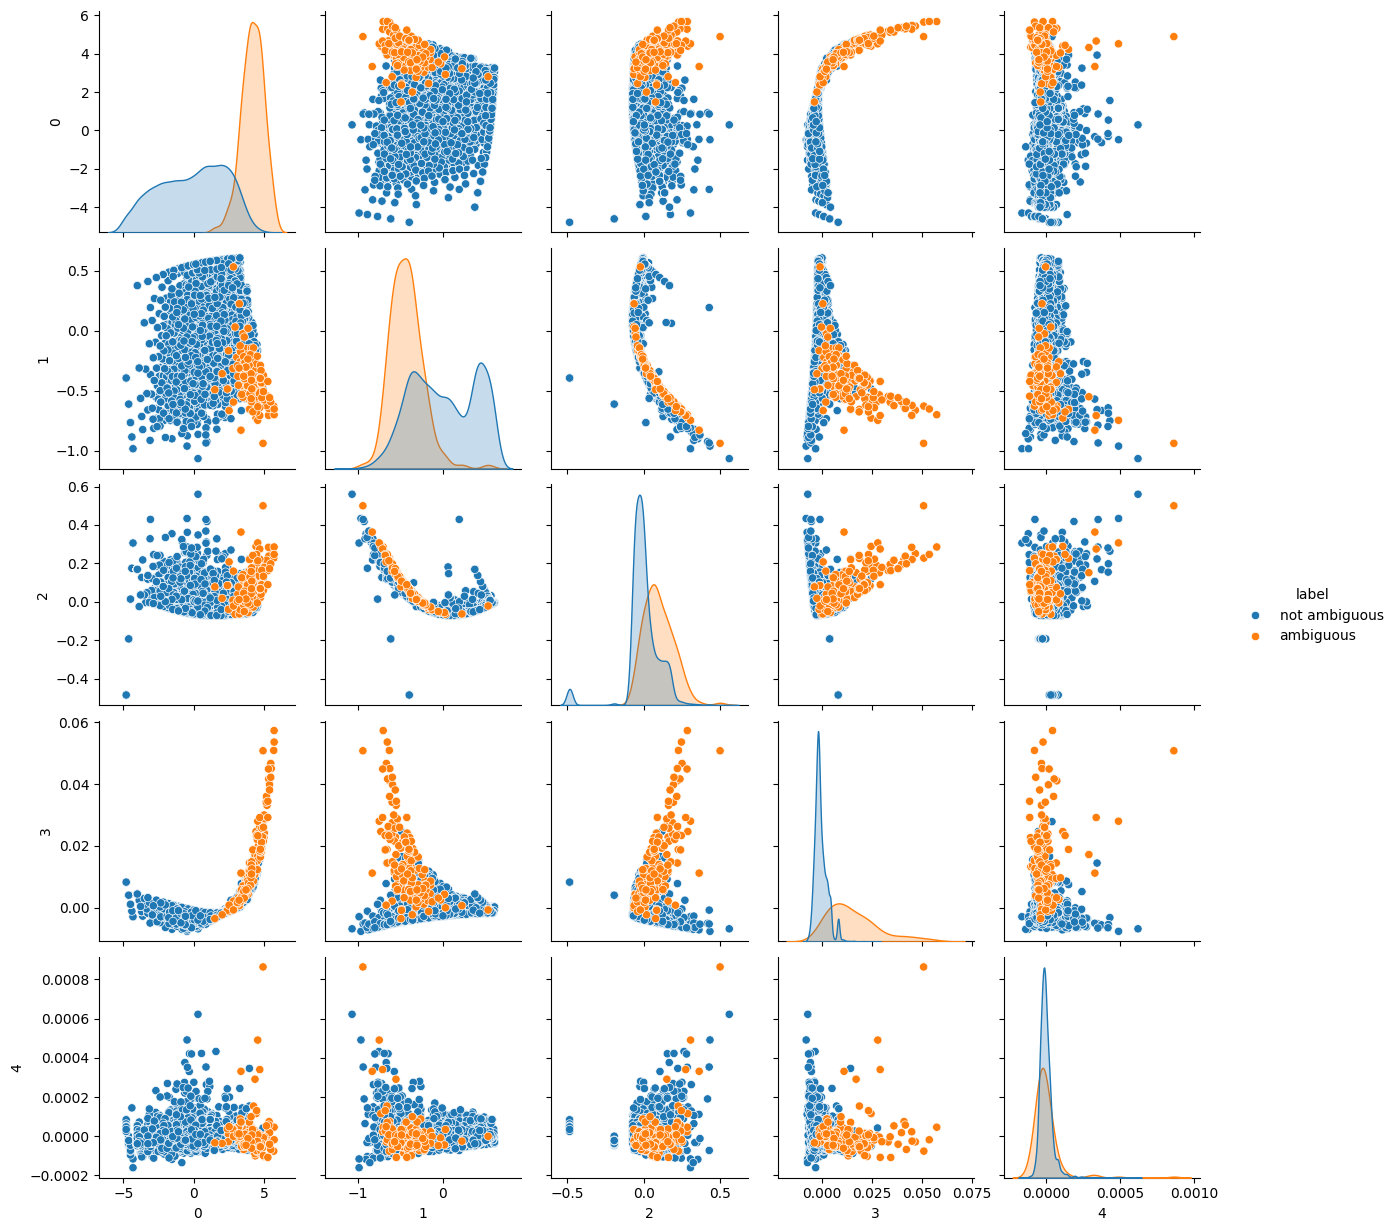

In [13]:
# Visualize manual features using PCA (with two features, PCA is trivial).
pca_manual = PCA(n_components=df_manual_features.shape[1]-1)
df_manual_features_pca = pd.DataFrame(pca_manual.fit_transform(df_manual_features.drop(columns=['label'])))
df_manual_features_pca["label"] = df_graph_data["label"].values
sns.pairplot(
    df_manual_features_pca,
    hue="label",
    diag_kind="kde",
    diag_kws={"common_norm": False},
)

### Observations & Explanations

What can you say about the pair graphs of the manual features vs its PCA?

## Now, we can perform some supervised learning.

In [18]:
import networkx as nx
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    balanced_accuracy_score,
)
# import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# import Pipeline

In [20]:
def supervised_learning_metrics(df_X, y, method:str, f_train=0.7)->pd.Series:
    """

    Run supervised learning on a graph and return metrics.

    The metrics are: accuracy, balanced accuracy, precision, recall, f1 score, matthews corrcoef, roc auc score.

    Parameters
    ----------
    df_X : pd.DataFrame
        Features
    y : pd.Series
        Labels
    method : str
        one of LogisticRegression, RandomForest
    """

    if method == 'LogisticRegression':
        clf = LogisticRegression(max_iter=300)
        y = LabelEncoder().fit_transform(y)
    elif method == 'RandomForest':
        clf = RandomForestClassifier(n_estimators=100)
    else:
        raise ValueError(f"Method {method} not supported")
    X_train, X_test, y_train, y_test = train_test_split(
            df_X, y, test_size=1 - f_train, random_state=42
        )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return pd.Series(
        {
            'accuracy': accuracy_score(y_test, y_pred),
            'balanced_accuracy': balanced_accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'matthews_corrcoef': matthews_corrcoef(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred)
        }
    )

In [16]:
df_node2vec_features['label'] = df_graph_data['label'].values

In [17]:
df_performances = pd.DataFrame()
for dataset_name, df_input in  {
        "manual_features": df_manual_features,
        "node2vec_features": df_node2vec_features,
        "manual_features_pca": df_manual_features_pca,
        "node2vec_features_pca": df_node2vec_features_pca,
    }.items():
    for method in ["LogisticRegression", "RandomForest"]:
        curr = supervised_learning_metrics(
            df_input.drop(columns=["label"]),
            df_graph_data["label"],
            method,
        )
        df_performances[f'{dataset_name}_{method}'] = curr

df_performances = df_performances.T
df_performances

# %%

,accuracy,balanced_accuracy,precision,recall,f1_score,matthews_corrcoef,roc_auc
manual_features_LogisticRegression,0.979353,0.789569,0.986572,0.992182,0.989369,0.635387,0.789569
manual_features_RandomForest,0.973847,0.755184,0.984430,0.988628,0.986525,0.546145,0.755184
node2vec_features_LogisticRegression,0.973159,0.618144,0.975661,0.997157,0.986292,0.409300,0.618144
node2vec_features_RandomForest,0.975224,0.650752,0.977700,0.997157,0.987333,0.477263,0.650752
manual_features_pca_LogisticRegression,0.979353,0.789569,0.986572,0.992182,0.989369,0.635387,0.789569
manual_features_pca_RandomForest,0.977288,0.767475,0.985169,0.991471,0.988310,0.594574,0.767475
node2vec_features_pca_LogisticRegression,0.971783,0.575376,0.972992,0.998579,0.985619,0.336423,0.575376
node2vec_features_pca_RandomForest,0.975912,0.703679,0.981066,0.994314,0.987646,0.528154,0.703679


Look at the high "accuracy" values and the low values of ROC AUC, matthews_corrcoef, and balanced_accuracy_score.